# Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values
print(x)


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


We want y to also have a 2d array like x and the StandardScaler class we will use later expercts a 2d array as it's input. So we now tranform y into a 2d array.

In [5]:
y = y.reshape((len(y),1))
#same as y.reshape((10,1))
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# Feature scaling

We do not have to split the dataset into the training and test set.
 We applied feature scaling only to the features before. In data preprocessing, the dependent variable took values of 0 and 1, which is why we did not apply feature scaling. 
 Here, we have to apply feature scaling to y i.e salary because we want the svr model to consider all values however dominant(high) it/they are!! 
 
 Remember to use different StandarScaler objects for x and y!! Because the mean and SD of x and y are different!!!! 

In [6]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [7]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [8]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Training SVR model on the whole dataset

In [9]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') #Gaussian Radial Basis Function
#rbf is a non-linear kernel!
regressor.fit(x,y)

/home/sushmitha/my_project_env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

# Predicting a new result

We will also inverse transform x and y after the previous feature scaling!!

In [10]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

# Vizualizing the SVR result

scatter- since x and y scaled, they must be inverse scaled.
plot- predicted salaries must be in the new scale of y!! 

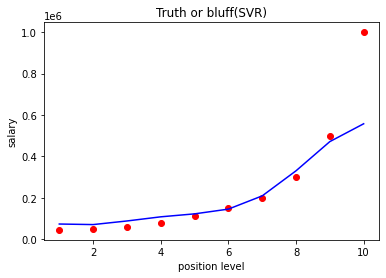

In [12]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), c = 'red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x)), c = 'blue')
plt.title('Truth or bluff(SVR)')
plt.xlabel('position level')
plt.ylabel('salary')
plt.show()

In [17]:
import seaborn as sns

# Vizualizing the SVR result for higher resolution and smoother curve

x_grid doesnt have to be transformed because it wasnt touched!!

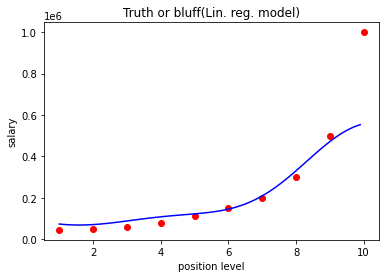

In [41]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), c = 'red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid))), c = 'blue')
plt.title('Truth or bluff(Lin. reg. model)')
plt.xlabel('position level')
plt.ylabel('salary')
plt.show()

However outliers are not caught well in the SVR model!!1